## Predicting heart disease using machine learning


This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on medical attributes

We're going to take the following approach

1. Problem defenition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem defenition

In a statement,

> Given a clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original dataset came from the Cleveland data from UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation

> If we can reach 95% accurac at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features

This is where you'll get details about the data

**Create data dictionary**

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation.


In [5]:
# Import all tools we need

# Regular Exploratory data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

## Load data


In [8]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data exploration (exploratory data analysis)

The goal here is to find out more about the dta and become a subject matter expert on the dataset


In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


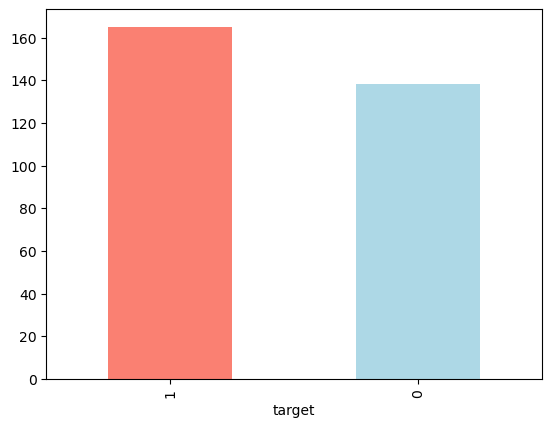

In [15]:
# Finding out how many classes we have  
df["target"].value_counts()

# Representing number of people with heart disease vs people who do not have heart disease
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [16]:
# Checking if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

sex      0    1
target         
0       24  114
1       72   93


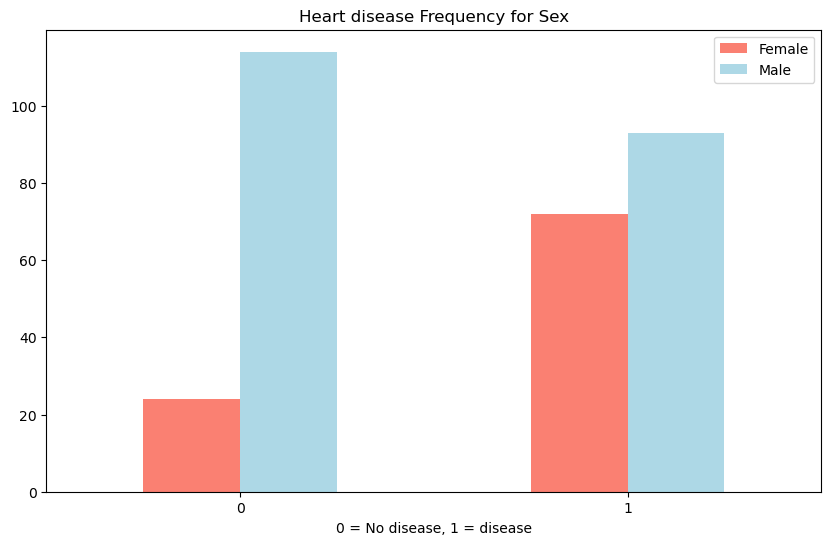

In [24]:
# Comparing Heart disease frequency with Sex
df.sex.value_counts()

print(pd.crosstab(df.target, df.sex))

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);

plt.title("Heart disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = disease")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

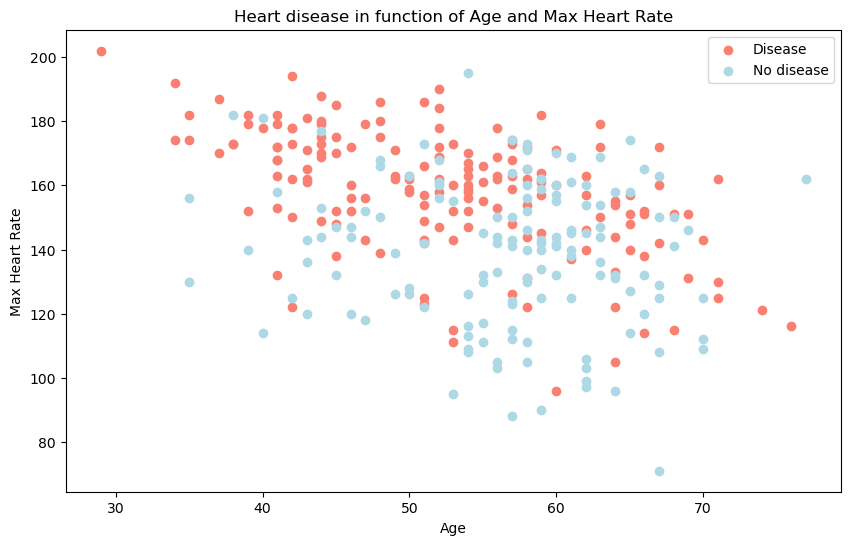

In [28]:
# Age vs Max Heart Rate for Heart disease

plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"])
plt.xticks(rotation=0);

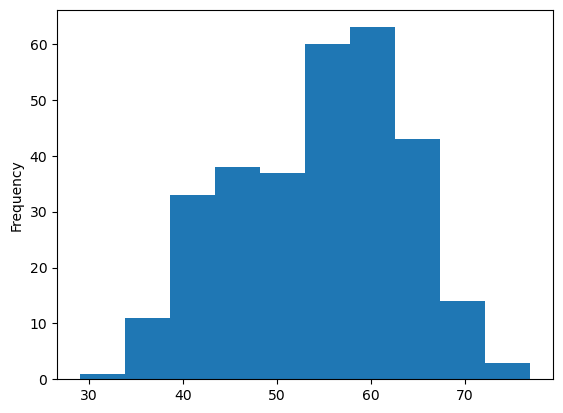

In [29]:
# Check distribution of Age

df.age.plot.hist();

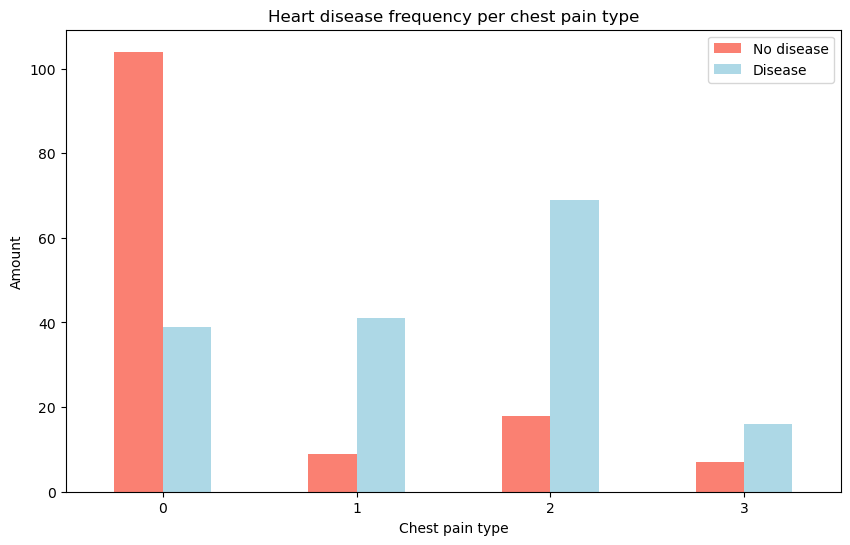

In [32]:
# Heart disease frequency per chest pain type

pd.crosstab(df.cp, df.target)

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])

plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

## 5. Modelling


In [33]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [35]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
np.random.seed(42)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
print(len(X_train))

X_train.head()

242


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [42]:
print(len(y_train))

y_train.head()

242


132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

Now we've got our data split into training and test sets, its time to build a model.

We'll train using the train set and we'll test using test set

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours
3. Random Forest Classifier


In [45]:
# Put models into dictionary
models = {
  "Logistic Regression": LogisticRegression(),
  "KNN": KNeighborsClassifier(),
  "Random Forest": RandomForestClassifier()  
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given machine learning models.
  models: a dict of different scikit learn models
  X_train: training data
  X_test: testing data
  y_train: training labels
  y_test: test labels
  """
  
  np.random.seed(42)
  
  model_scores = {}
  
  for name, model in models.items():
    model.fit(X_train, y_train)
    
    model_scores[name] = model.score(X_test, y_test)
    
  return model_scores

In [47]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

model_scores

/Users/vt_op/Desktop/cancer-analysi/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison


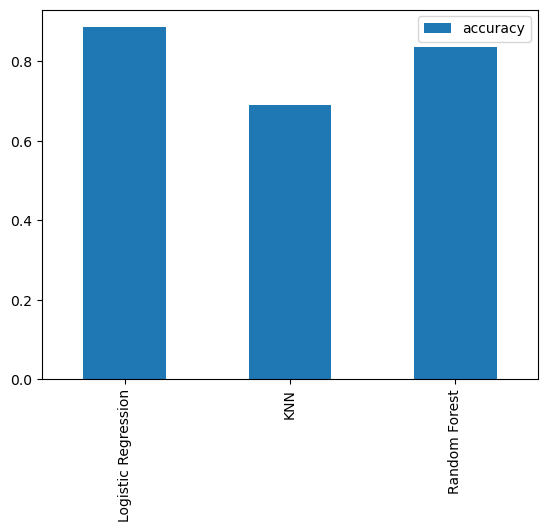

In [48]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model, lets experiment with them and try to improve them

1. Hyperparamter tuning
2. Feature Importance
3. Confusion matrix
4. Precision
5. Recall
6. F1 Score
7. Classification report
8. ROC Curve
9. Area under the curve (AUC)


### Hyperparamter tuning


Tuning KNN model by manual method


In [55]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)
  
  knn.fit(X_train, y_train)
  
  train_scores.append(knn.score(X_train, y_train))
  
  test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on test data is: 75.41% with 11 paramters


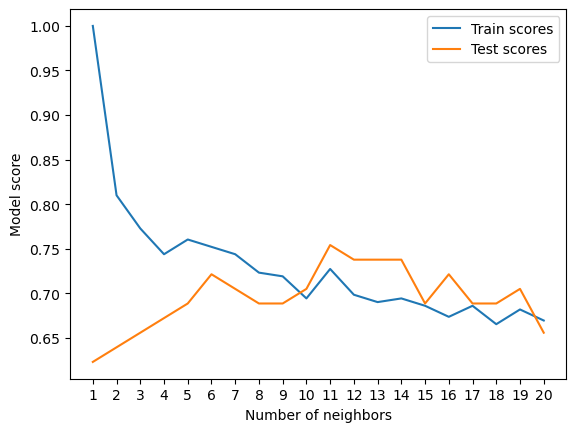

In [62]:
plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on test data is: {max(test_scores)*100:.2f}% with 11 paramters")

### Tuning Logistic Regression by RandomizedSeacrhCV


In [70]:
# Create hyperparmater grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10,1000,50), 
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(1,20,2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparamter grids for each of our models, lets tune them using RandomizedSearchCV...


In [71]:
# Tune LogisticRegression 

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit model for Logistic Regression
print(rs_log_reg.fit(X_train, y_train))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)


In [72]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [73]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Tuning Random Forest Classifier


In [75]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

print(rs_rf.fit(X_train, y_train))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)


/Users/vt_op/Desktop/cancer-analysi/env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vt_op/Desktop/cancer-analysi/env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/vt_op/Desktop/cancer-analysi/env/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/vt_op/Deskt

In [ ]:
# Find the best hyperparmaters
rs_rf.best_params_

{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(3),
 'min_samples_leaf': np.int64(13),
 'max_depth': 5}

In [77]:
# Evaluating model
rs_rf.score(X_test, y_test)

0.8688524590163934

### Tuning using GridSearchCV

Since our Logistic Regression model provides the best scores so far, we'll try and improve them using GridSearchCV


In [79]:
# Different hyperparameters using LogisticRegression model

log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5, 
                          verbose=True)

# Fit grid hyperparameter search model
print(gs_log_reg.fit(X_train, y_train))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)


In [80]:
# Check best parameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [81]:
# Evaluate model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

Now that we've found the best model it is time to evaluate it beyond just accracy

1. ROC Curve and AUC score
2. Confusion matrix
3. Classification report
4. Precision
5. Recall
6. F1 Score


In [ ]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

#### ROC Curve: Plotting true positive rate vs false postive rates


0.925646551724138


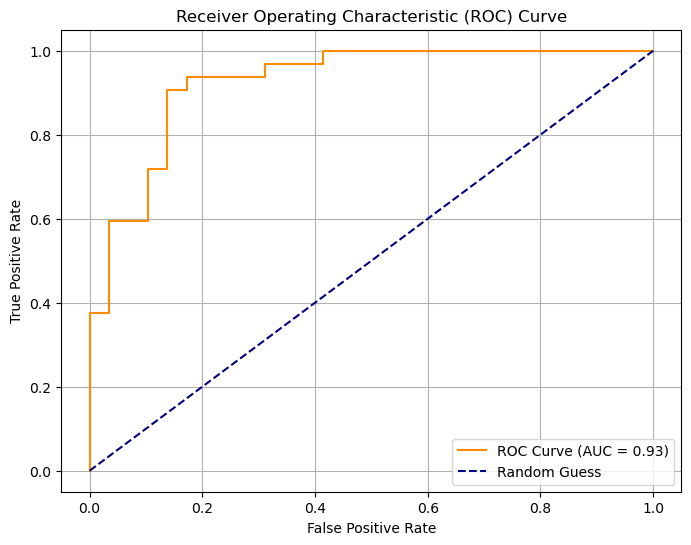

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_probs = gs_log_reg.predict_proba(X_test)[:, 1]

# Compute False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(auc_score)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Confusion matrix


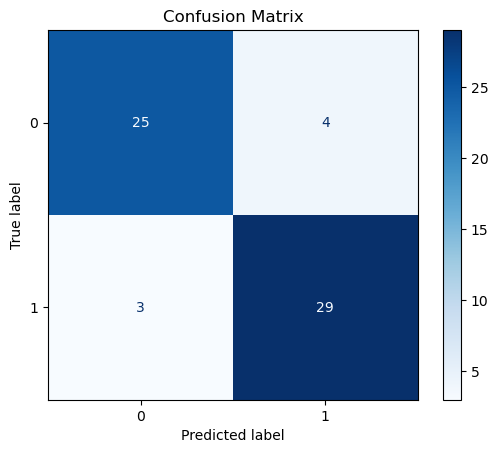

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtain predicted class labels from your model
y_pred = gs_log_reg.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_log_reg.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Classification report


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Calculating metrics using cross-validation


In [86]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [88]:
# Create new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, 
                         solver="liblinear")

In [99]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [100]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [101]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [102]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1 

np.float64(0.8673007976269721)

<Axes: title={'center': 'Cross validated classified'}>

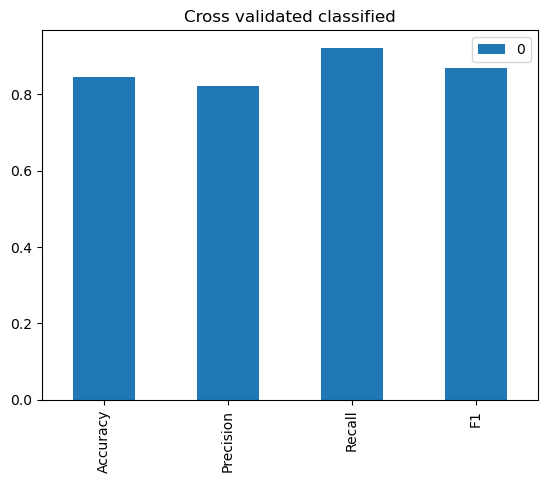

In [104]:
# Visulaize cross-validated metrics
cv_metrics = pd.DataFrame({
  "Accuracy": cv_acc,
  "Precision": cv_precision,
  "Recall": cv_recall,
  "F1": cv_f1
}, index=[0])

cv_metrics.T.plot.bar(title="Cross validated classified")

### Feature Importance


In [106]:
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [107]:
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [108]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

# Tell us how much each column contributes to finding the labels
feature_dict

{'age': np.float64(0.0031672800489608455),
 'sex': np.float64(-0.8604464974271708),
 'cp': np.float64(0.6606704082728109),
 'trestbps': np.float64(-0.01156993196274824),
 'chol': np.float64(-0.0016637440923087717),
 'fbs': np.float64(0.04386107313075342),
 'restecg': np.float64(0.3127584615862929),
 'thalach': np.float64(0.02459361332045646),
 'exang': np.float64(-0.6041307948760266),
 'oldpeak': np.float64(-0.568628039197438),
 'slope': np.float64(0.4505162753782247),
 'ca': np.float64(-0.636098965095586),
 'thal': np.float64(-0.6766337239240338)}

<Axes: title={'center': 'Feature Importance'}>

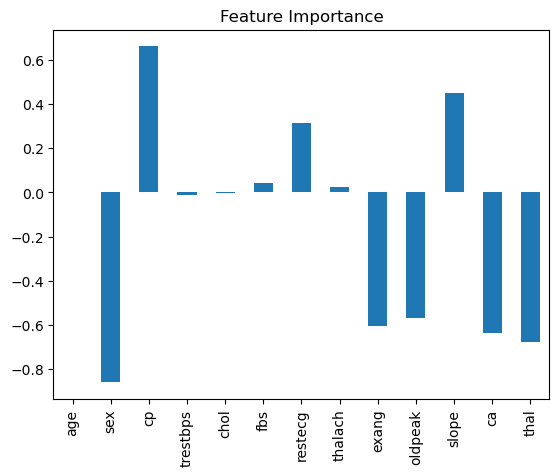

In [109]:
# Visualizing
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)